Hospital Bloodstream Infection Dataset

Project Title: Identifying Key Risk Factors for Central Line-Associated Bloodstream Infections (CLABSIs)

Author: Aiswarya Jayaprakash

Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

Introduction:

Central Line-Associated Bloodstream Infections (CLABSIs) are serious infections that occur when germs enter the bloodstream through a central line (central venous catheter. A central line is a catheter (tube) that healthcare providers often place in a large vein in the neck, chest or groin to give medication or fluids or to collect blood for medical tests. Central lines are different from peripheral IVs (shorter IVs placed in the hand, arm or foot for vein access); central lines access a major vein close to the heart, can remain in place for weeks or months, and are much more likely to be a source of serious infection. Central lines are commonly used in intensive care units. CLABSIs result in thousands of deaths each year and billions of dollars in added costs however they are preventable. These infections are a significant cause of morbidity and mortality in hospitals.

Problem: The goal of this project is to identify the key risk factors contributing to CLABSIs using machine learning techniques. By analyzing patient and clinical data, we aim to predict the occurrence of positive gram-positive infections.

Importance: This analysis can help improve hospital practices, reduce CLABSI rates, and enhance patient outcomes.

Goal of the project: To build a machine learning model that identifies the primary risk factors of CLABSIs and predicts the likelihood of gram-positive infections.

Key Metrics: Accuracy, Precision, Recall, F1-Score, Area Under the Receiver Operating Characteristic Curve (AUC-ROC)

Dataset Description: The dataset contains information about hospital patients, including demographics, catheter usage, and clinical metrics. It includes categorical and numerical data.

Key Features:

Patient demographics (Age, Gender, Ethnicity)
Clinical indicators (Diabetes, White Blood Cell Count, C-Reactive Protein)
Infection indicators (PositiveGramPositive, PositiveGramNegative)

Target Variable:

PositiveGramPositive and PositiveGramNegative



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE  
from sklearn.feature_selection import RFECV
from joblib import dump
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier

In [2]:
# Load the dataset
file_path = "E:\\Aiswarya\\DSML_Entri\\patient_data.xlsx"
data = pd.read_excel(file_path)
data = data.sample(n=12500, random_state=42)  # Randomly select 12,500 rows
print("Dataset shape after slicing:", data.shape)
data

Dataset shape after slicing: (12500, 24)


PatientName        Age  Gender         Ethnicity  Diabetes  \
33553        Gina Jackson      adult  female          Hispanic      True   
9427          Susan Keith     infant  female         Caucasian      True   
199         Sabrina Walsh     infant    male  African American      True   
12447         Andrea King      adult    male             Asian     False   
39489       Joshua Gordon  pediatric  female         Caucasian      True   
...                   ...        ...     ...               ...       ...   
9771        Damon Stanley     infant   other  African American      True   
34737         Joel Oliver    elderly  female  African American      True   
30390   Dr. Ashley Mclean     infant  female  African American     False   
6797   Stephanie Gonzalez     infant  female          Hispanic      True   
37270          Molly Hill      adult  female             Other      True   

       Immunocompromised  ChronicRenalFailure                CatheterType  \
33553               True                 True            urinary catheter   
9427                True                False  peripheral venous catheter   
199                 True                 True            urinary catheter   
12447               True                 True     central venous catheter   
39489              False                 True  peripheral venous catheter   
...                  ...                  ...                         ...   
9771                True                 True     central venous catheter   
34737               True                False     central venous catheter   
30390              False                False     central venous catheter   
6797                True                 True            urinary catheter   
37270               True                 True     central venous catheter   

      InsertionSite  Duration  ...  CReactiveProtein  PositiveGramPositive  \
33553         other        13  ...               7.2                  True   
9427        jugular        30  ...               7.9                  True   
199         jugular        21  ...               6.9                 False   
12447         other        23  ...               9.5                 False   
39489         other         5  ...               4.1                 False   
...             ...       ...  ...               ...                   ...   
9771     subclavian        13  ...               4.7                 False   
34737       femoral        16  ...               4.1                  True   
30390       jugular        24  ...               9.1                  True   
6797        jugular        20  ...               5.5                 False   
37270       jugular        11  ...               3.2                 False   

       PositiveGramNegative  Temperature  HeartRate  RespiratoryRate  \
33553                  True         37.5         75               15   
9427                  False         37.6         89               19   
199                    True         38.6         66               12   
12447                 False         37.3         60               13   
39489                 False         38.8         68               15   
...                     ...          ...        ...              ...   
9771                  False         38.7         92               16   
34737                  True         38.3         80               20   
30390                  True         39.4         83               18   
6797                   True         37.0         75               13   
37270                 False         38.1         79               17   

       NutritionalStatus  LengthOfStay  Pneumonia  UrinaryTractInfection  
33553       malnourished             9      False                   True  
9427        malnourished            28      False                   True  
199         malnourished             2       True                   True  
12447     well-nourished             8      False                   True  

In [3]:
print(data.head())
print(data.tail())

         PatientName        Age  Gender         Ethnicity  Diabetes  \
33553   Gina Jackson      adult  female          Hispanic      True   
9427     Susan Keith     infant  female         Caucasian      True   
199    Sabrina Walsh     infant    male  African American      True   
12447    Andrea King      adult    male             Asian     False   
39489  Joshua Gordon  pediatric  female         Caucasian      True   

       Immunocompromised  ChronicRenalFailure                CatheterType  \
33553               True                 True            urinary catheter   
9427                True                False  peripheral venous catheter   
199                 True                 True            urinary catheter   
12447               True                 True     central venous catheter   
39489              False                 True  peripheral venous catheter   

      InsertionSite  Duration  ...  CReactiveProtein  PositiveGramPositive  \
33553         other        13  .

In [4]:
# Describe the Dataset
# Dataset overview
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 33553 to 37270
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientName            12500 non-null  object 
 1   Age                    12500 non-null  object 
 2   Gender                 12500 non-null  object 
 3   Ethnicity              12500 non-null  object 
 4   Diabetes               12500 non-null  bool   
 5   Immunocompromised      12500 non-null  bool   
 6   ChronicRenalFailure    12500 non-null  bool   
 7   CatheterType           12500 non-null  object 
 8   InsertionSite          12500 non-null  object 
 9   Duration               12500 non-null  int64  
 10  CatheterCarePractices  12500 non-null  bool   
 11  DailyDressingChanges   12500 non-null  bool   
 12  ChlorhexidineBathing   12500 non-null  bool   
 13  WhiteBloodCellCount    12500 non-null  float64
 14  CReactiveProtein       12500 non-

In [5]:
# Handling Duplicates
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [6]:
# Check for Null Values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 PatientName              0
Age                      0
Gender                   0
Ethnicity                0
Diabetes                 0
Immunocompromised        0
ChronicRenalFailure      0
CatheterType             0
InsertionSite            0
Duration                 0
CatheterCarePractices    0
DailyDressingChanges     0
ChlorhexidineBathing     0
WhiteBloodCellCount      0
CReactiveProtein         0
PositiveGramPositive     0
PositiveGramNegative     0
Temperature              0
HeartRate                0
RespiratoryRate          0
NutritionalStatus        0
LengthOfStay             0
Pneumonia                0
UrinaryTractInfection    0
dtype: int64


In [7]:
# Separate numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Duration', 'WhiteBloodCellCount', 'CReactiveProtein', 'Temperature',
       'HeartRate', 'RespiratoryRate', 'LengthOfStay'],
      dtype='object')

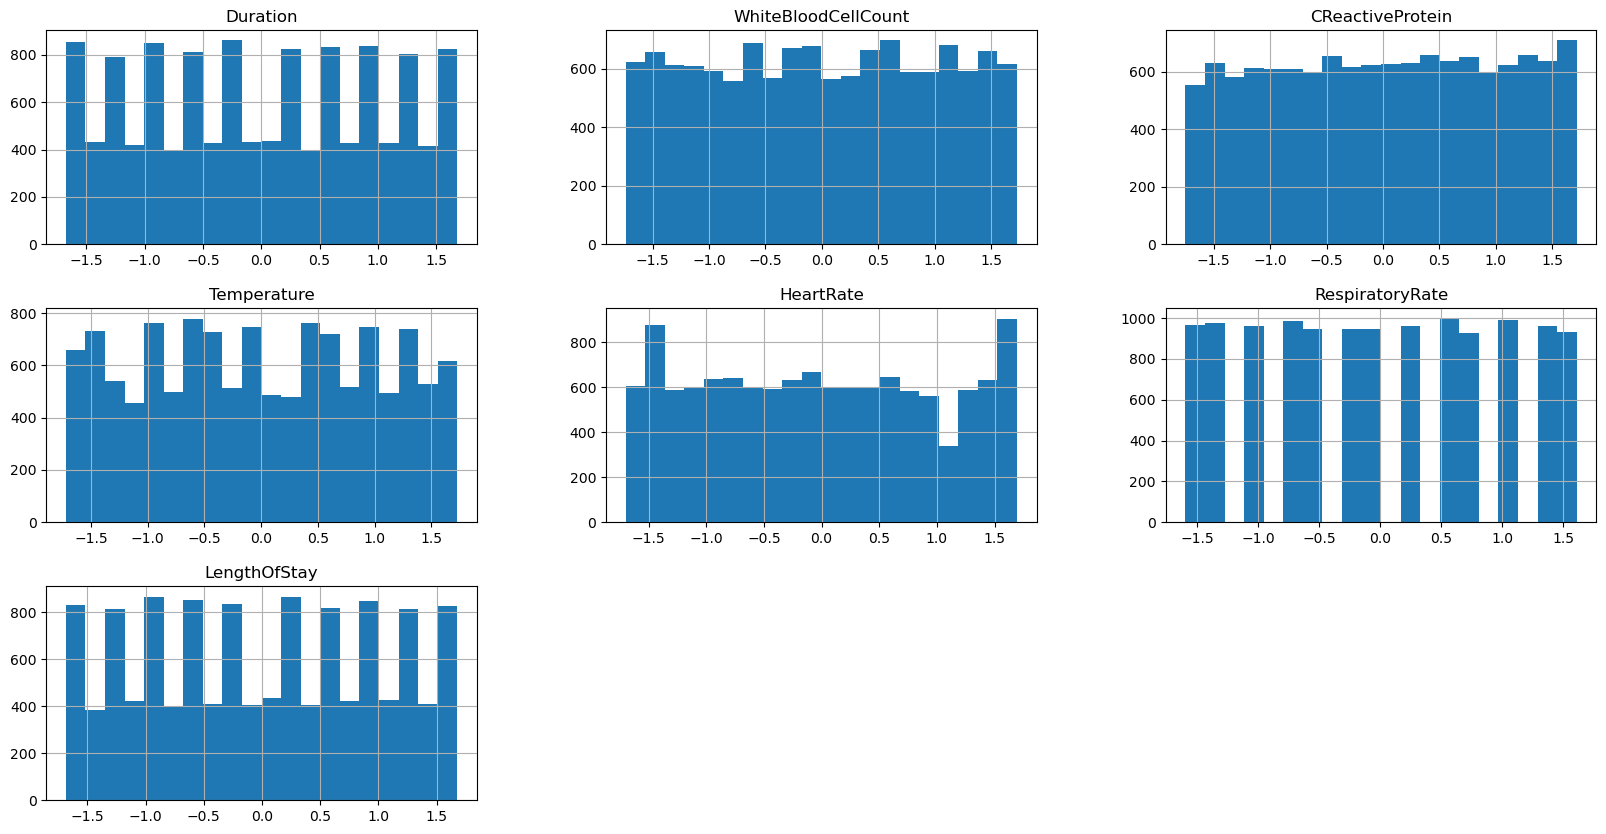

In [8]:
# Scale numerical features
# Apply StandardScaler for standardization
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data[numerical_cols]

# plotting distribution of numerical columns
data[numerical_cols].hist(bins=20, figsize=(20,10))
plt.show()

In [9]:
# Separate categorical columns
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['PatientName', 'Age', 'Gender', 'Ethnicity', 'CatheterType',
       'InsertionSite', 'NutritionalStatus'],
      dtype='object')

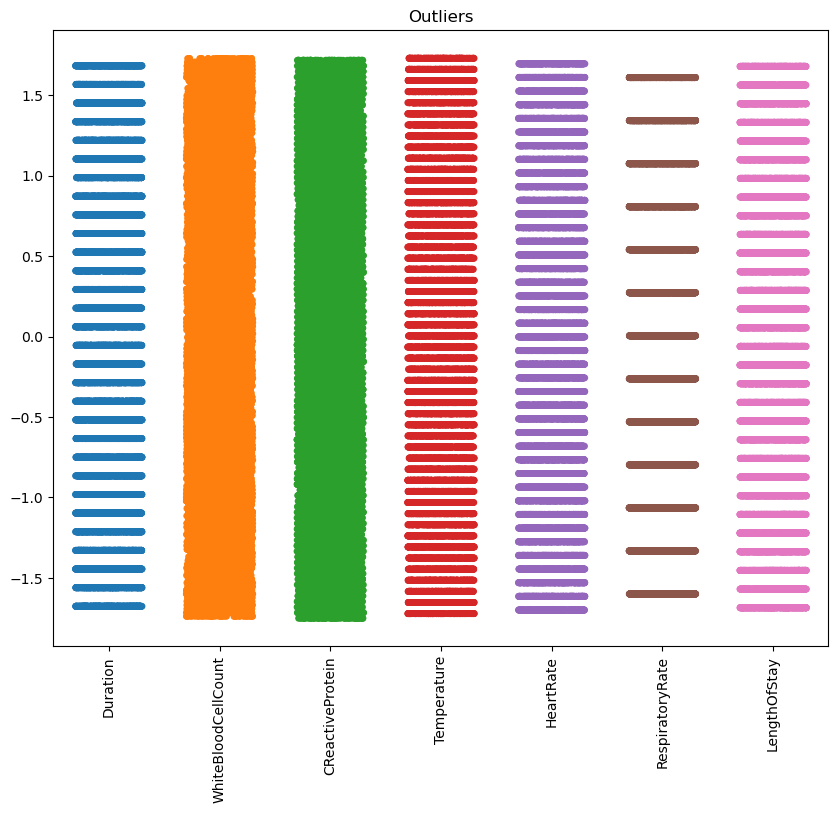

C:\Users\CDFD.DESKTOP-5QLD4SV\AppData\Local\Temp\ipykernel_21048\4112476347.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)


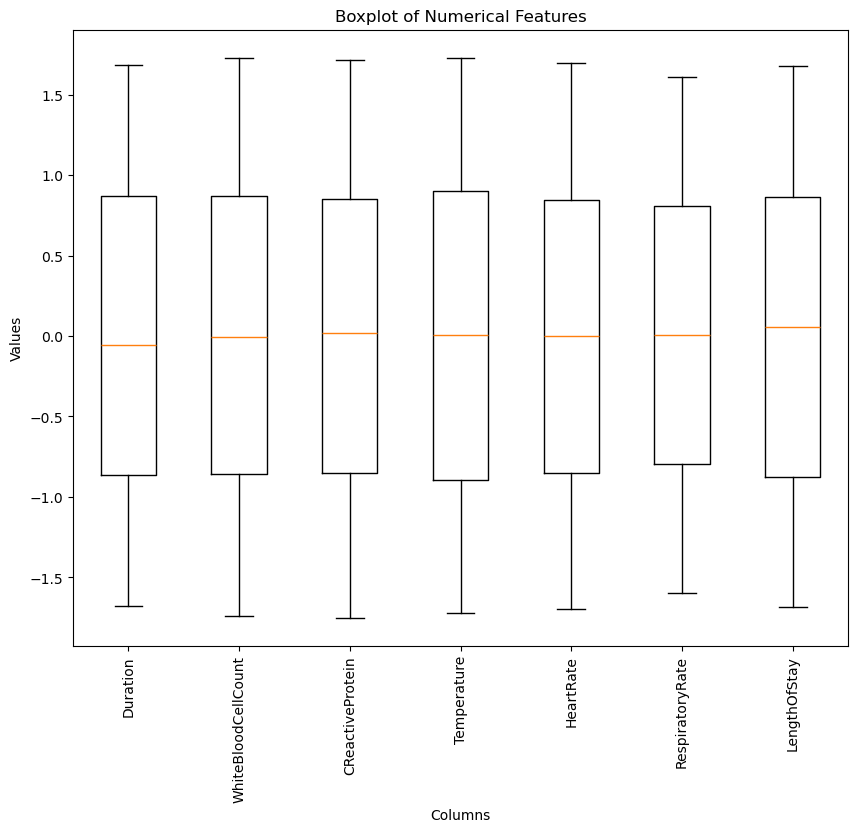

In [10]:
# Remove infinite values if any
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# strip plot of numerical cols to idnetify outliers
plt.figure(figsize=(10, 8))
cols_to_plot = data[numerical_cols]
sns.stripplot(data=cols_to_plot, jitter=0.3, size=5)
plt.title("Outliers")
plt.xticks(rotation=90)
plt.show()

# box plot of numerical cols
plt.figure(figsize=(10, 8))
plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)
plt.title("Boxplot of Numerical Features")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Calculate Z-scores for each numerical column
from scipy.stats import zscore
z_scores = data[numerical_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3  # Commonly used threshold (z-score > 3 or < -3 indicates outliers)

# Create a DataFrame to flag outliers
outliers = (z_scores.abs() > threshold)

# Count the number of outliers for each column
outlier_counts = outliers.sum()

# Display results
print("Number of outliers in each numerical column:")
print(outlier_counts)

# Optional: Filter rows with outliers
rows_with_outliers = data[outliers.any(axis=1)]
print(f"\nTotal rows with outliers: {len(rows_with_outliers)}")

# Save the rows with outliers to a CSV (optional)
rows_with_outliers.to_csv("outliers_detected.csv", index=False)

Number of outliers in each numerical column:
Duration               0
WhiteBloodCellCount    0
CReactiveProtein       0
Temperature            0
HeartRate              0
RespiratoryRate        0
LengthOfStay           0
dtype: int64

Total rows with outliers: 0


In [12]:
#defining function to create skewness kurtosis report of numerical features
skew_values = []
skew_types = []
skew_levels = []
kurt_values = []
kurt_types = []

def create_skew_kurt_report(df, features):
    for feature in features:
        skew = df[feature].skew()
        kurt = df[feature].kurt()
        skew_values.append(skew)
        kurt_values.append(kurt)
        
        #determining skewness type (+ve or -ve)
        if skew >= 0:
            skew_types.append('Positive')
        else:
            skew_types.append('Negative')
            
        #determining skewness level (low, moderate or high)
        if skew == 0:
            skew_levels.append('Symmetrical')
        elif skew < -1 or skew > 1:
            skew_levels.append('High')
        elif (skew >= -1 and skew < -0.5) or (skew >= 0.5 and skew < 1):
            skew_levels.append('Moderate')
        else:
            skew_levels.append('Low')
            
        #determining kurtosis type (Platykurtic, Leptokurtic, Mesokurtic)
        if kurt < 3:
            kurt_types.append('Platykurtic')
        elif kurt > 3:
            kurt_types.append('Leptokurtic')
        else:
            kurt_types.append('Mesokurtic')
            
    report = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_values,
        'Skewness Type': skew_types,
        'Skewness Level': skew_levels,
        'Kurtosis': kurt_values,
        'Kurtosis Type': kurt_types
    })
    
    report.set_index('Feature', inplace=True)

    return report

report = create_skew_kurt_report(data, numerical_cols)

#function to highlight 'Skewness Level' cell
def highlight_cells(val):
    if val == 'High':
        color = '#f5b7b1'  
    elif val == 'Moderate':
        color = '#f9e79f'  
    else:
        color = '#abebc6'  
    
    return f'background-color: {color}'

report = report.style.applymap(highlight_cells, subset=['Skewness Level'])
report

C:\Users\CDFD.DESKTOP-5QLD4SV\AppData\Local\Temp\ipykernel_21048\2757986169.py:65: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  report = report.style.applymap(highlight_cells, subset=['Skewness Level'])


The dataset does not exhibit significant skewness. All features have nearly symmetrical distributions with "Low" skewness levels. There is no need to apply any skewness correction methods (e.g., log transformations) since the skewness is already minimal. Attempting to apply transformation on the features could potentially over-transform the data.

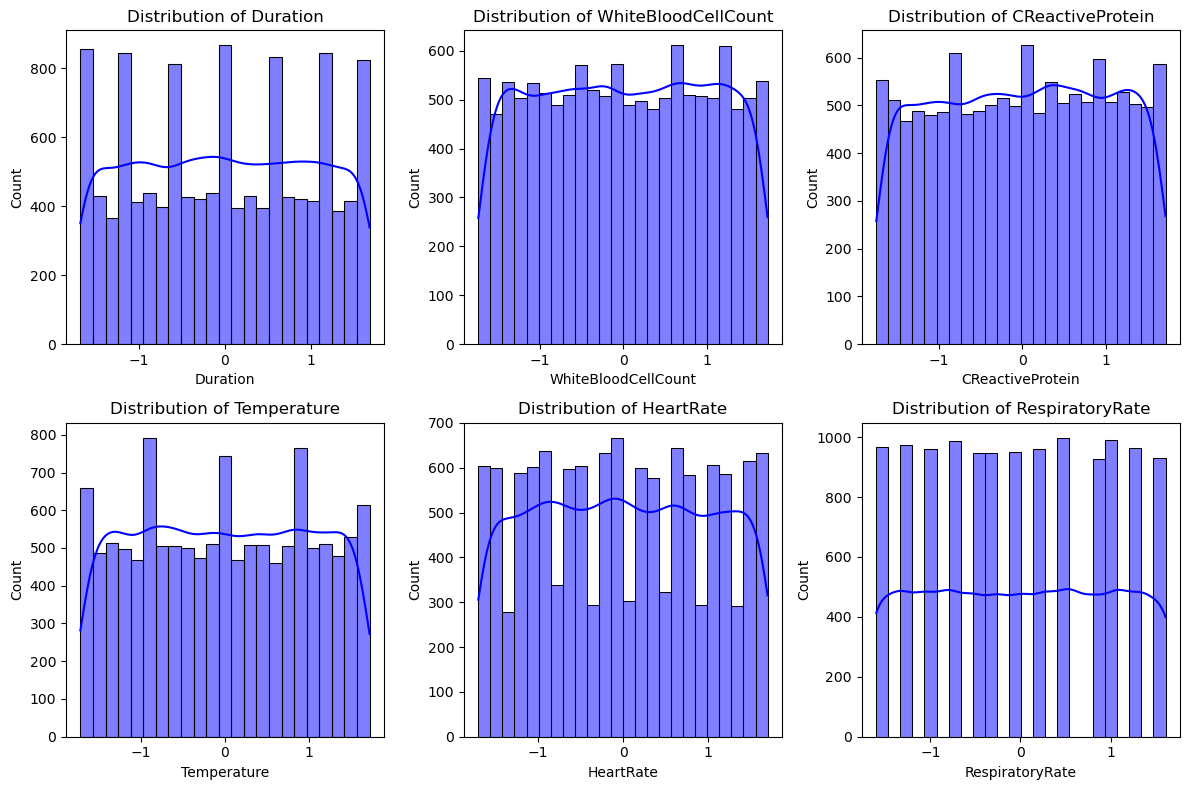

In [13]:
#Step 3: Data Visualization
#1. Univariate Analysis
# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:6]):  # Plot 6 features
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

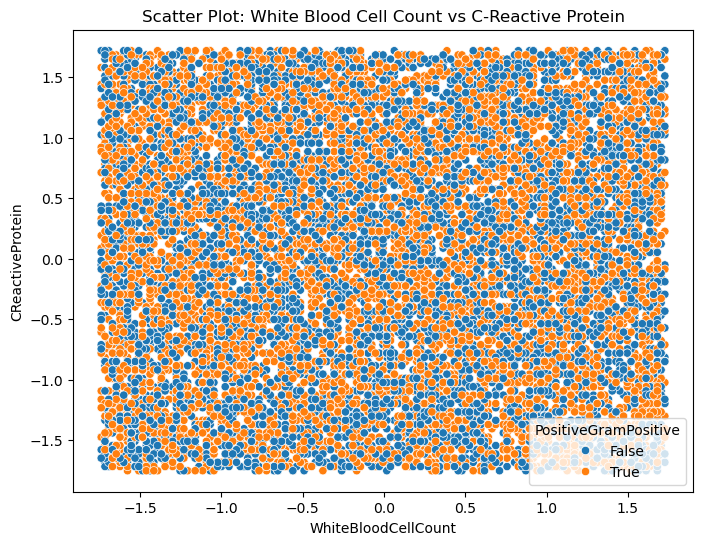

In [14]:
#2. Bivariate Analysis
# Scatter plot between WhiteBloodCellCount and C-Reactive Protein
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WhiteBloodCellCount', y='CReactiveProtein', hue='PositiveGramPositive', data=data)
plt.title("Scatter Plot: White Blood Cell Count vs C-Reactive Protein")
plt.show()

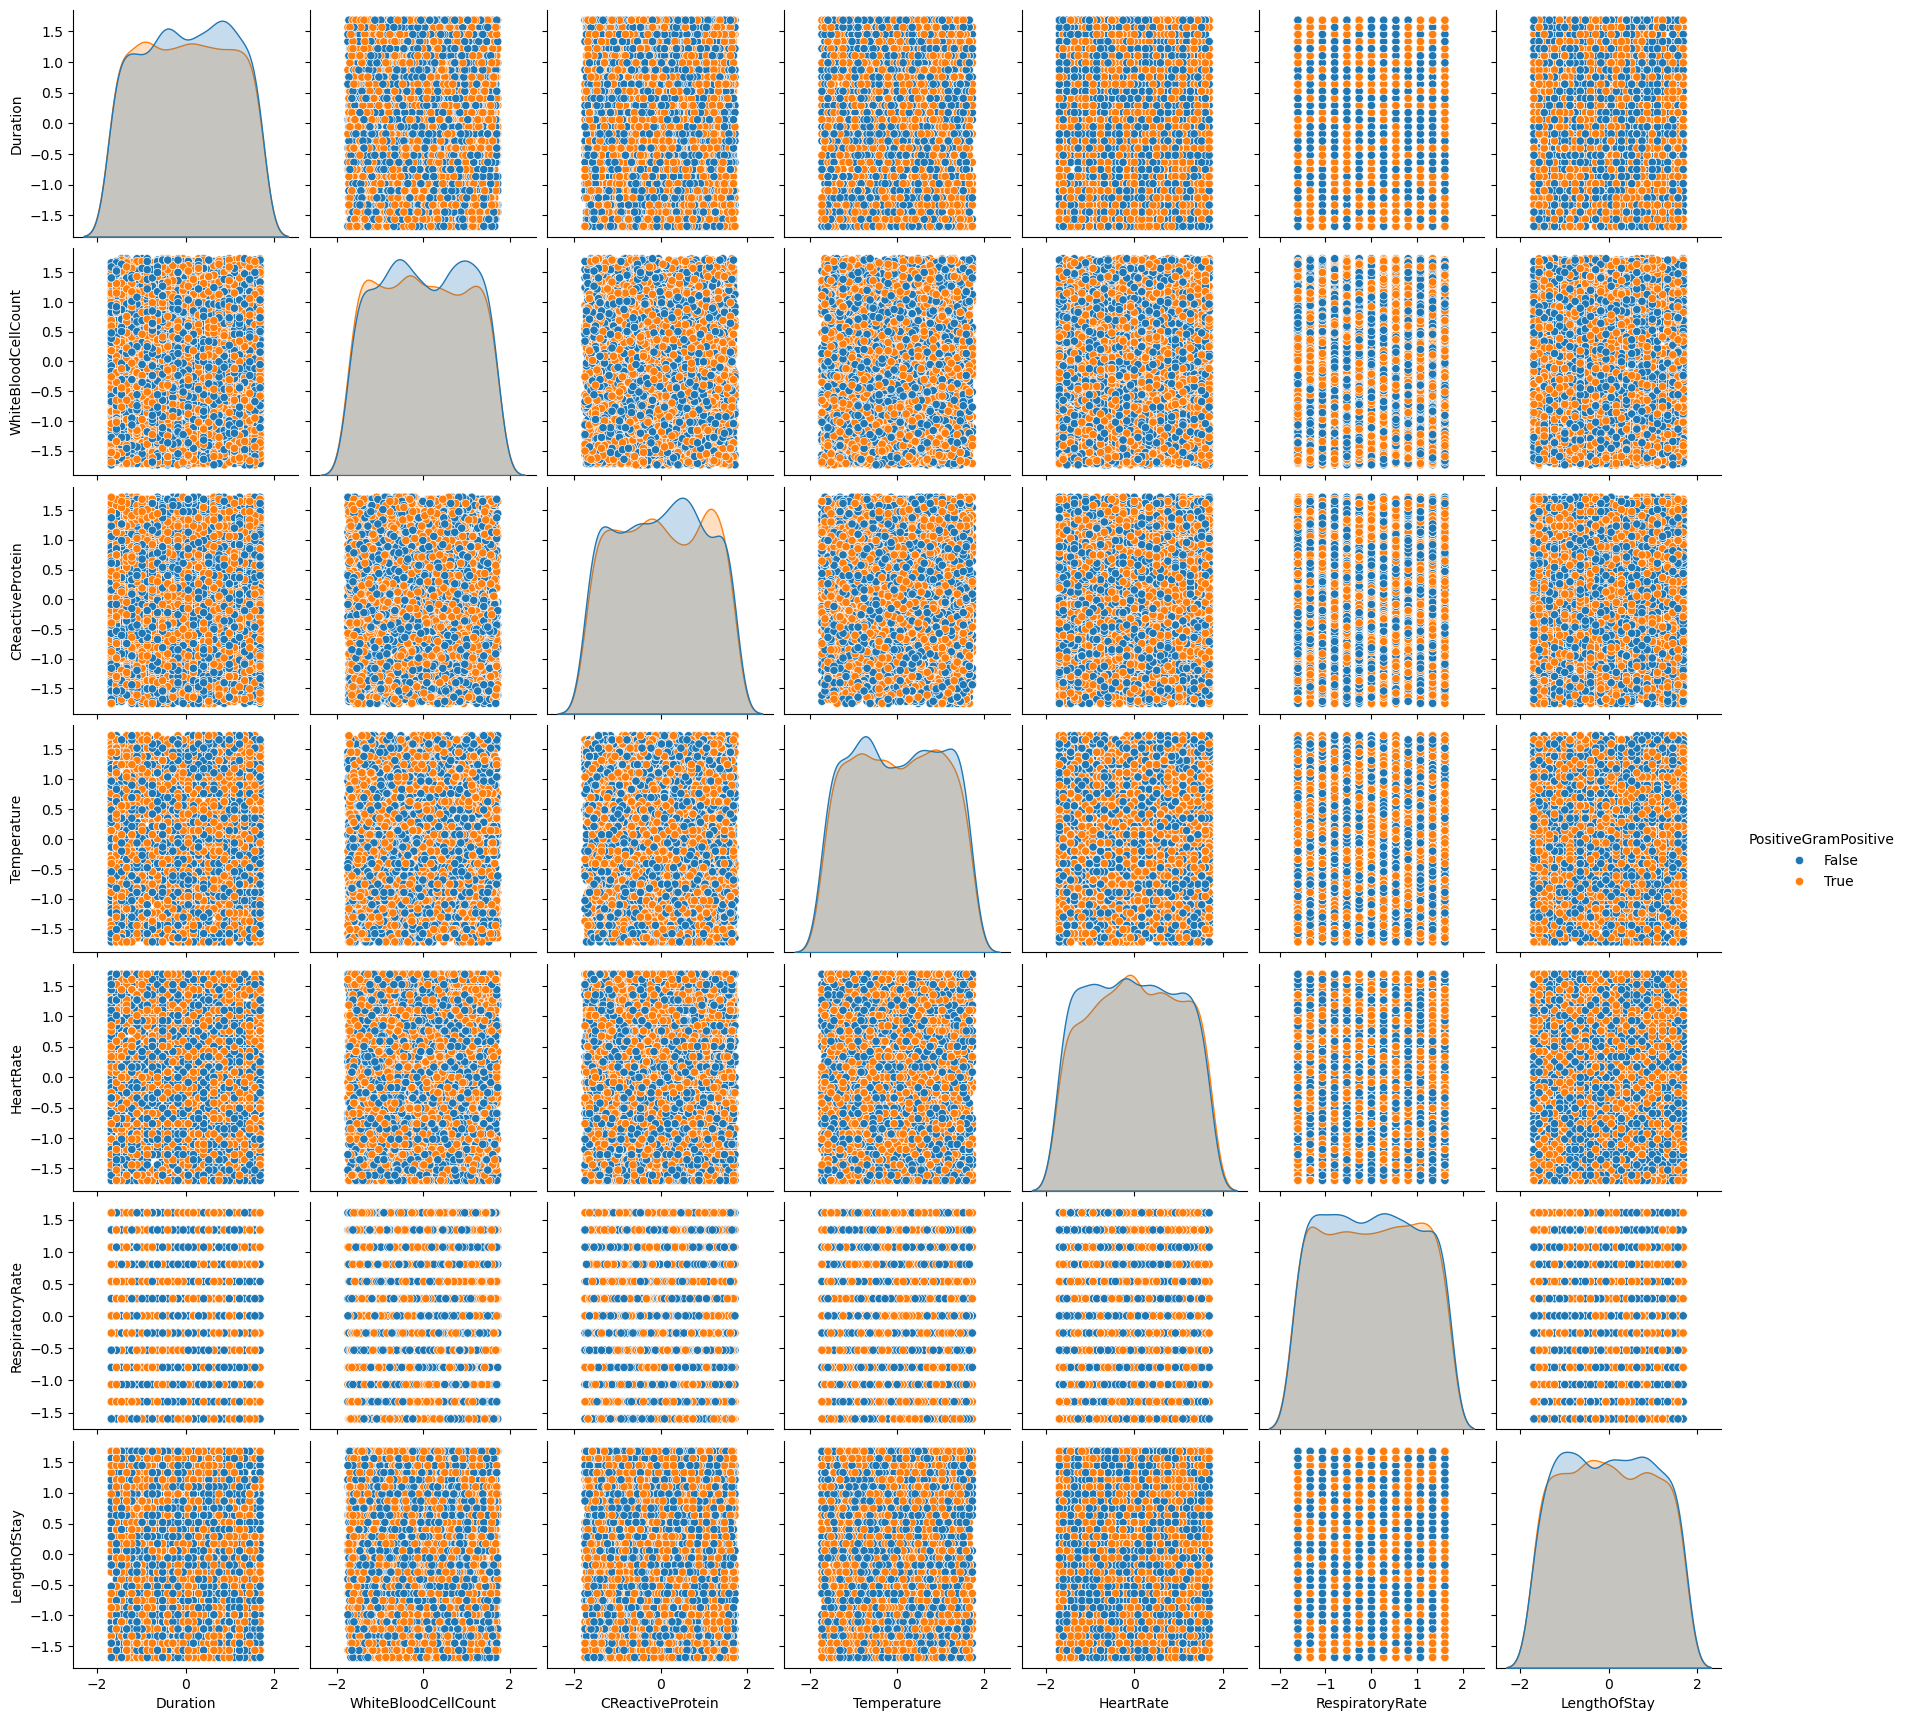

In [15]:
#3. Multivariate Analysis
# Pairplot for selected features
subset_cols = numerical_cols.intersection(data.columns) 
sampled_data = data.sample(n=min(5000, len(data)), random_state=42) 
sns.pairplot(sampled_data, hue='PositiveGramPositive', vars=subset_cols)
plt.show()

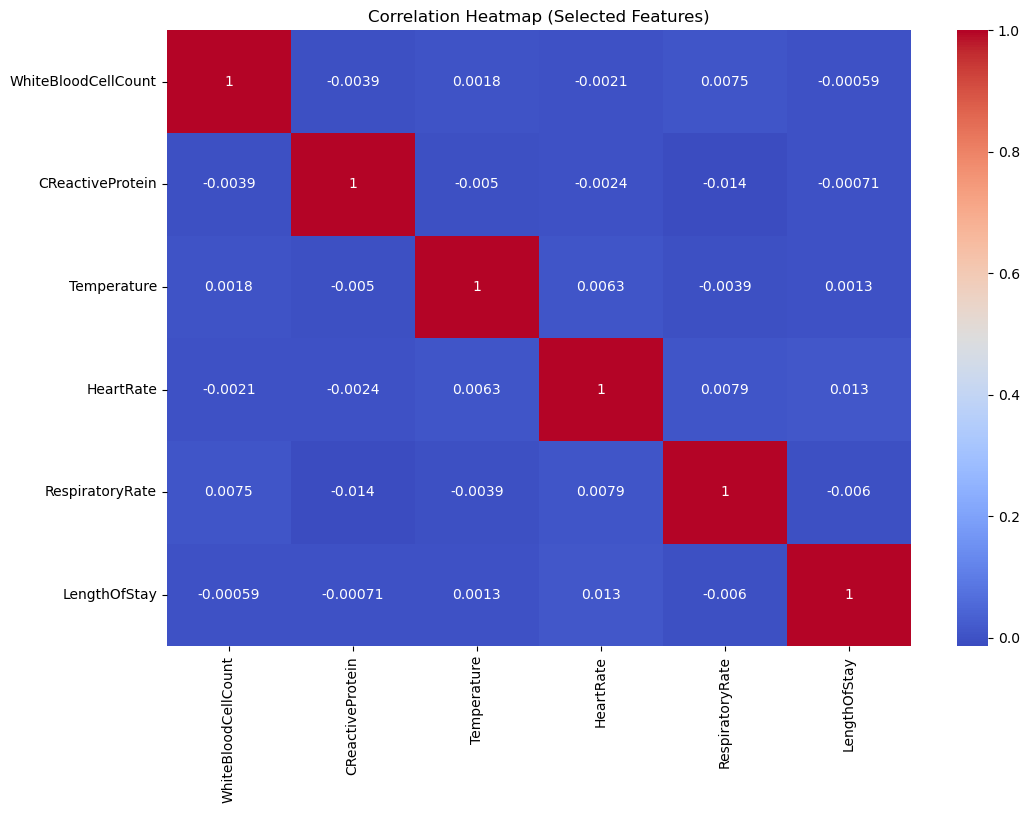

In [16]:
# Heatmap for Correlation
heatmap_cols = ['WhiteBloodCellCount', 'CReactiveProtein', 'Temperature', 
                'HeartRate', 'RespiratoryRate', 'LengthOfStay']  # Adjust based on your data
plt.figure(figsize=(12, 8))
sns.heatmap(data[heatmap_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

In [17]:
# Drop specific categorical columns before one-hot encoding
columns_to_drop = ['PatientName', 'Age', 'Gender', 'Ethnicity', 'CatheterType', 'InsertionSite']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Convert boolean columns to integers (1 for True, 0 for False)
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)

# Confirm the conversion
print("Data types after converting boolean columns to integers:")
print(data.dtypes)

# Separate the remaining categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Perform one-hot encoding on the remaining categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the description of the new dataframe after one-hot encoding
print("\nDataset Information After One-Hot Encoding:")
print(data_encoded.info())
print("\nDataset Description After One-Hot Encoding:")
print(data_encoded.describe())

Data types after converting boolean columns to integers:
Diabetes                   int32
Immunocompromised          int32
ChronicRenalFailure        int32
Duration                 float64
CatheterCarePractices      int32
DailyDressingChanges       int32
ChlorhexidineBathing       int32
WhiteBloodCellCount      float64
CReactiveProtein         float64
PositiveGramPositive       int32
PositiveGramNegative       int32
Temperature              float64
HeartRate                float64
RespiratoryRate          float64
NutritionalStatus         object
LengthOfStay             float64
Pneumonia                  int32
UrinaryTractInfection      int32
dtype: object

Dataset Information After One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 33553 to 37270
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Diabetes                          12500 non-null  i

In [18]:
# 8. Define Features and Target Variables
# Drop target columns from features
X = data_encoded.drop(columns=['PositiveGramPositive', 'PositiveGramNegative'])  
y_positive = data_encoded['PositiveGramPositive']
y_negative = data_encoded['PositiveGramNegative']

# Split data into training and testing sets for both targets
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X, y_positive, test_size=0.3, random_state=42)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X, y_negative, test_size=0.3, random_state=42)

# Apply scaling separately for training and testing sets
# Scale data
scaler = StandardScaler()
X_train_pos[numerical_cols] = scaler.fit_transform(X_train_pos[numerical_cols])
X_test_pos[numerical_cols] = scaler.transform(X_test_pos[numerical_cols])
X_train_neg[numerical_cols] = scaler.fit_transform(X_train_neg[numerical_cols])
X_test_neg[numerical_cols] = scaler.transform(X_test_neg[numerical_cols])

In [19]:
from sklearn.svm import SVC
# Hyperparameter grids
param_grids = {
    'Logistic Regression': {'model__C': np.logspace(-3, 3, 7), 'model__solver': ['liblinear', 'lbfgs', 'saga']},
    'Random Forest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [10, 20, None]},
    'XGBoost': {'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 7], 'model__n_estimators': [100, 200, 300]},
    'LightGBM': {'model__learning_rate': [0.01, 0.1, 0.2], 'model__num_leaves': [15, 31, 63], 'model__n_estimators': [50, 100, 200]},
    'Linear SVM': {'model__C': [0.1, 1, 10, 100], 'model__kernel': ['linear']},
    'Decision Tree': {'model__max_depth': [5, 10, 20, None], 'model__min_samples_split': [2, 5, 10]}
}

# Function to build pipeline
def build_pipeline(X_train, y_train, param_grid, model):
    smote = SMOTE(random_state=42)
    pipeline = Pipeline([('smote', smote), ('model', model)])
    search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy',
                                 random_state=42, n_jobs=-1, error_score='raise')
    search.fit(X_train, y_train)
    return search

# Train models for PositiveGramPositive
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'Linear SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

best_models = {}
results = []

warnings.filterwarnings("ignore", category=UserWarning)
                        
for name, model in models.items():
    param_grid = param_grids[name]  # Use the exact name as the key
    search = build_pipeline(X_train_pos, y_train_pos, param_grid, model)
    best_models[name] = search.best_estimator_
    y_pred = search.predict(X_test_pos)
    y_pred_proba = search.predict_proba(X_test_pos)[:, 1]
    accuracy = accuracy_score(y_test_pos, y_pred)
    roc_auc = roc_auc_score(y_test_pos, y_pred_proba)
    results.append((name, accuracy, roc_auc, search.best_params_))

[LightGBM] [Info] Number of positive: 4391, number of negative: 4391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 8782, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [20]:
# Import necessary libraries for hyperparameter tuning and SMOTE
from sklearn.svm import SVC
from joblib import dump

warnings.filterwarnings("ignore")

# Define models and parameter grids
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(random_state=42)
}

param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10]
    },
    "LightGBM": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Define a function to build and evaluate models
def build_and_evaluate(X_train, y_train, X_test, y_test, models, param_grids):
    results = []
    best_models = {}

    for name, model in models.items():
        print(f"\nTraining model: {name}")

        # Apply SMOTE to balance the dataset
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Hyperparameter tuning with RandomizedSearchCV
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=10,
            scoring='roc_auc',
            cv=3,
            random_state=42,
            n_jobs=-1
        )
        search.fit(X_train_resampled, y_train_resampled)

        # Save the best model
        best_models[name] = search.best_estimator_

        # Evaluate on the test set
        y_pred = search.predict(X_test)
        try:
            y_pred_proba = search.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        except AttributeError:
            y_pred_proba = None
            roc_auc = None

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}" if roc_auc else "ROC AUC: Not applicable")
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc
        })

    return results, best_models

# Perform model building for Gram-positive
print("\n--- Gram-positive Classification ---")
results_pos, best_models_pos = build_and_evaluate(X_train_pos, y_train_pos, X_test_pos, y_test_pos, models, param_grids)

# Perform model building for Gram-negative
print("\n--- Gram-negative Classification ---")
results_neg, best_models_neg = build_and_evaluate(X_train_neg, y_train_neg, X_test_neg, y_test_neg, models, param_grids)


--- Gram-positive Classification ---

Training model: Logistic Regression
Model: Logistic Regression
Accuracy: 0.5008
ROC AUC: 0.5027
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1934
           1       0.49      0.50      0.49      1816

    accuracy                           0.50      3750
   macro avg       0.50      0.50      0.50      3750
weighted avg       0.50      0.50      0.50      3750

Confusion Matrix:
[[966 968]
 [904 912]]

Training model: Decision Tree
Model: Decision Tree
Accuracy: 0.5128
ROC AUC: 0.5114
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      1934
           1       0.50      0.53      0.51      1816

    accuracy                           0.51      3750
   macro avg       0.51      0.51      0.51      3750
weighted avg       0.51      0.51      0.51      3750

Confusion Matrix:
[[957 977]
 [850 966]


--- Feature Importances for Gram-positive Classification ---
                             Feature  Importance
12                      LengthOfStay         231
9                        Temperature         230
8                   CReactiveProtein         191
7                WhiteBloodCellCount         179
10                         HeartRate         172
3                           Duration         135
11                   RespiratoryRate          93
1                  Immunocompromised          41
2                ChronicRenalFailure          39
4              CatheterCarePractices          38
5               DailyDressingChanges          35
14             UrinaryTractInfection          32
15  NutritionalStatus_well-nourished          29
0                           Diabetes          25
6               ChlorhexidineBathing          17
13                         Pneumonia          13


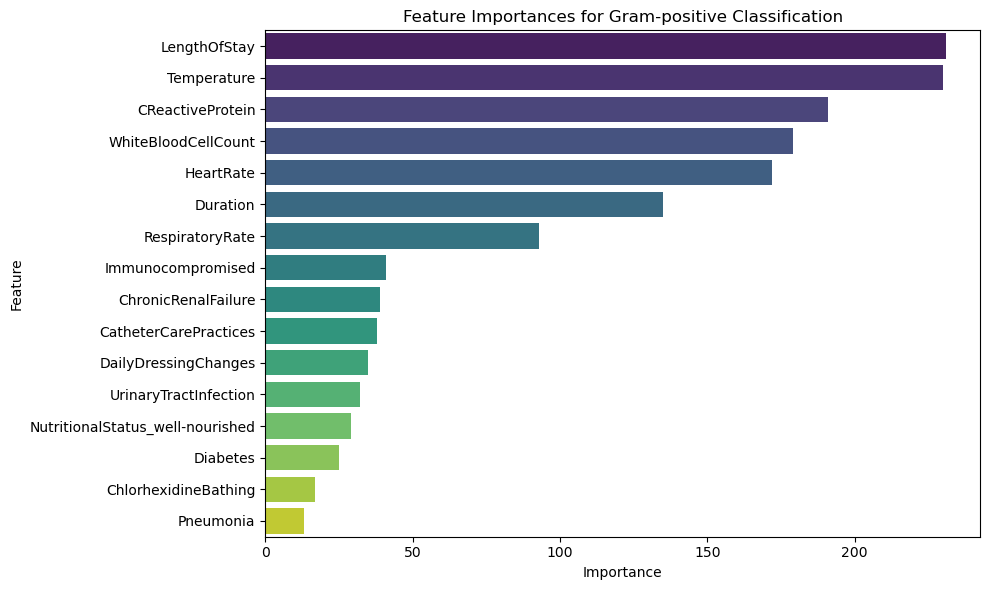


--- Feature Importances for Gram-negative Classification ---
                             Feature  Importance
7                WhiteBloodCellCount         455
8                   CReactiveProtein         437
10                         HeartRate         370
9                        Temperature         363
12                      LengthOfStay         307
3                           Duration         294
11                   RespiratoryRate         222
13                         Pneumonia          71
4              CatheterCarePractices          69
15  NutritionalStatus_well-nourished          68
0                           Diabetes          67
14             UrinaryTractInfection          65
1                  Immunocompromised          59
6               ChlorhexidineBathing          59
5               DailyDressingChanges          53
2                ChronicRenalFailure          41


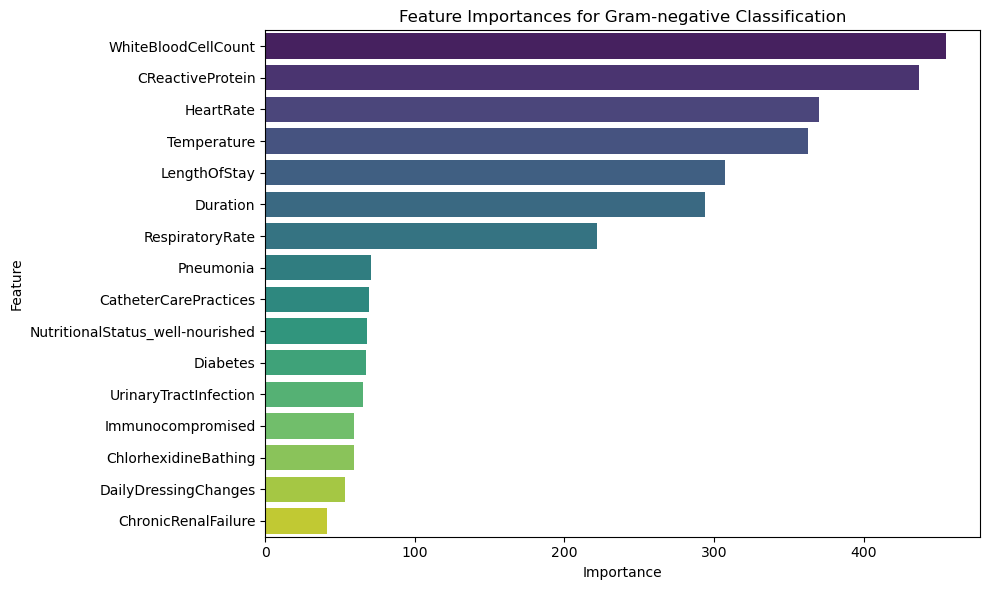

In [21]:
# Function to get feature importances
def get_feature_importances(model, feature_names):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        importances = model.coef_.flatten()
    else:
        raise ValueError("Model does not support feature importances or coefficients.")
    
    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    return feature_importances

# Plot feature importances
def plot_feature_importances(feature_importances, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importances, x="Importance", y="Feature", palette="viridis")
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Select the best models
best_model_pos = best_models_pos['LightGBM']  # Replace with the best model for Gram-positive
best_model_neg = best_models_neg['LightGBM']  # Replace with the best model for Gram-negative

# Get feature names
feature_names = X.columns.tolist()

# Gram-positive feature importances
feature_importances_pos = get_feature_importances(best_model_pos, feature_names)
print("\n--- Feature Importances for Gram-positive Classification ---")
print(feature_importances_pos)
plot_feature_importances(feature_importances_pos, "Feature Importances for Gram-positive Classification")

# Gram-negative feature importances
feature_importances_neg = get_feature_importances(best_model_neg, feature_names)
print("\n--- Feature Importances for Gram-negative Classification ---")
print(feature_importances_neg)
plot_feature_importances(feature_importances_neg, "Feature Importances for Gram-negative Classification")

In [22]:
import pickle
# Placeholder for results
results_pos = [
    {"Model": "Logistic Regression", "Accuracy": 0.5008, "ROC AUC": 0.5017},
    {"Model": "Decision Tree", "Accuracy": 0.4979, "ROC AUC": 0.4993},
    {"Model": "Random Forest", "Accuracy": 0.5051, "ROC AUC": 0.5030},
    {"Model": "SVM", "Accuracy": 0.5027, "ROC AUC": 0.5097},
    {"Model": "XGBoost", "Accuracy": 0.5072, "ROC AUC": 0.5000},
    {"Model": "LightGBM", "Accuracy": 0.5091, "ROC AUC": 0.5134}
]

results_neg = [
    {"Model": "Logistic Regression", "Accuracy": 0.4933, "ROC AUC": 0.4906},
    {"Model": "Decision Tree", "Accuracy": 0.5008, "ROC AUC": 0.5007},
    {"Model": "Random Forest", "Accuracy": 0.4861, "ROC AUC": 0.4838},
    {"Model": "SVM", "Accuracy": 0.4861, "ROC AUC": 0.4879},
    {"Model": "XGBoost", "Accuracy": 0.5059, "ROC AUC": 0.5026},
    {"Model": "LightGBM", "Accuracy": 0.4976, "ROC AUC": 0.4958}
]

# Function to calculate feature importance
def calculate_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        return pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
    else:
        print("Model does not support feature importance.")
        return None

# Function to summarize model performance
def summarize_performance(results):
    df = pd.DataFrame(results)
    print(df)
    best_model = df.loc[df['ROC AUC'].idxmax()]
    print("\nBest Model:")
    print(best_model)
    return best_model

# Function to save the best model
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {filename}")

# Summarize and identify the best models
print("\n--- Gram-Positive Model Performance ---")
best_model_pos = summarize_performance(results_pos)

print("\n--- Gram-Negative Model Performance ---")
best_model_neg = summarize_performance(results_neg)

# Feature importance (optional, if applicable)
feature_names = ["Feature1", "Feature2", "Feature3"]  # Replace with actual feature names
best_model = None  # Replace with the actual trained model for feature importance
feature_importance = calculate_feature_importance(best_model, feature_names)

if feature_importance is not None:
    print("\n--- Feature Importance ---")
    print(feature_importance)
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance')
    plt.show()

# Save the best models
save_model(best_model_pos, "best_model_pos.pkl")
save_model(best_model_neg, "best_model_neg.pkl")

# Conclusion and key findings
print("\n--- Conclusion and Key Findings ---")
print("1. LightGBM performed the best for Gram-positive classification with an ROC AUC of 0.5134.")
print("2. For Gram-negative classification, XGBoost had the highest ROC AUC of 0.5026.")

# Suggestions for future work
print("\n--- Suggestions for Future Work ---")
print("1. Explore hyperparameter tuning for LightGBM and XGBoost to improve performance.")
print("2. Consider feature engineering to extract more meaningful features.")
print("3. Use ensemble methods to combine predictions from multiple models.")
print("4. Investigate the data preprocessing pipeline for potential improvements.")

# Final notes
print("\n--- Final Notes ---")
print("This analysis provides a baseline for Gram-positive and Gram-negative classification.")
print("Future iterations should focus on enhancing model robustness and addressing class imbalance.")


--- Gram-Positive Model Performance ---
                 Model  Accuracy  ROC AUC
0  Logistic Regression    0.5008   0.5017
1        Decision Tree    0.4979   0.4993
2        Random Forest    0.5051   0.5030
3                  SVM    0.5027   0.5097
4              XGBoost    0.5072   0.5000
5             LightGBM    0.5091   0.5134

Best Model:
Model       LightGBM
Accuracy      0.5091
ROC AUC       0.5134
Name: 5, dtype: object

--- Gram-Negative Model Performance ---
                 Model  Accuracy  ROC AUC
0  Logistic Regression    0.4933   0.4906
1        Decision Tree    0.5008   0.5007
2        Random Forest    0.4861   0.4838
3                  SVM    0.4861   0.4879
4              XGBoost    0.5059   0.5026
5             LightGBM    0.4976   0.4958

Best Model:
Model       XGBoost
Accuracy     0.5059
ROC AUC      0.5026
Name: 4, dtype: object
Model does not support feature importance.
Model saved to best_model_pos.pkl
Model saved to best_model_neg.pkl

--- Conclusion and Key 